Clustering des clients d'un centre commercial avec K-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# ------------------------------------------------------------------------------
# 1. Chargement des données
# ------------------------------------------------------------------------------
print("1-CHARGEMENT : Lecture du fichier 'Mall_Customers.csv'...")
data = pd.read_csv("Mall_Customers.csv")
print("Aperçu des données :\n", data.head())

1-CHARGEMENT : Lecture du fichier 'Mall_Customers.csv'...
Aperçu des données :
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# ------------------------------------------------------------------------------
# 2. Nettoyage et prétraitement
# ------------------------------------------------------------------------------
print("\n2-NETTOYAGE : Vérification des valeurs manquantes et standardisation...")


2-NETTOYAGE : Vérification des valeurs manquantes et standardisation...


In [4]:
# **Valeurs manquantes**
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)
if missing_values.any():
    print("\n Attention : Valeurs manquantes détectées. Suppression ou imputation recommandée.")
    data.dropna(inplace=True)  # Suppression simple (à adapter si nécessaire)

Valeurs manquantes par colonne :
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# **Standardisation des variables quantitatives**
scaler = StandardScaler()
features_to_scale = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scaled_features = scaler.fit_transform(data[features_to_scale])
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale)

In [6]:
# **Optionnel : Encodage de 'Gender' (0/1)**
scaled_data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

In [7]:
# ------------------------------------------------------------------------------
# 3. EDA (Exploratory Data Analysis)
# ------------------------------------------------------------------------------
print("\n3-EDA : Analyse exploratoire avec histogrammes, boxplots et corrélations...")


3-EDA : Analyse exploratoire avec histogrammes, boxplots et corrélations...


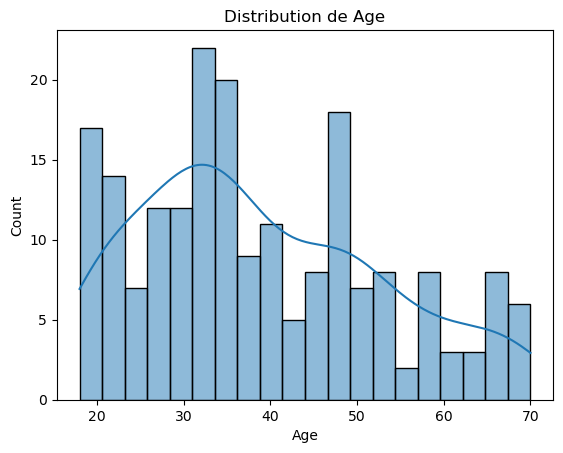

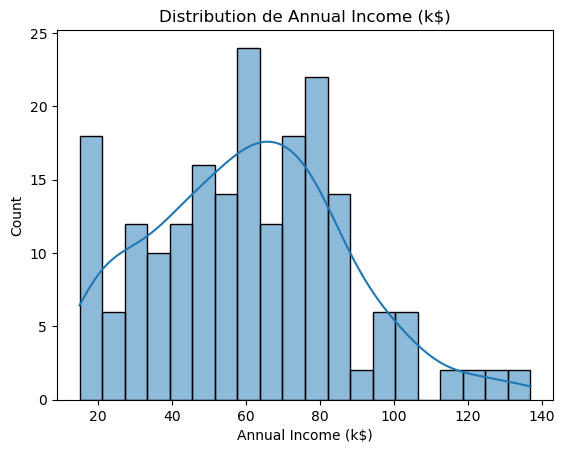

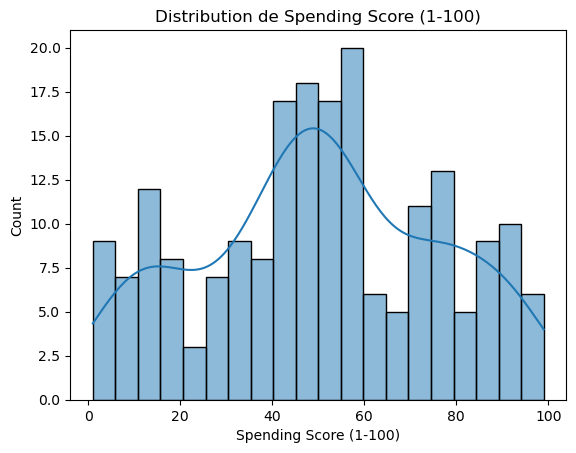

In [8]:
# **Histogrammes**
for col in features_to_scale:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution de {col}")
  #  plt.savefig(f"hist_{col}.png")

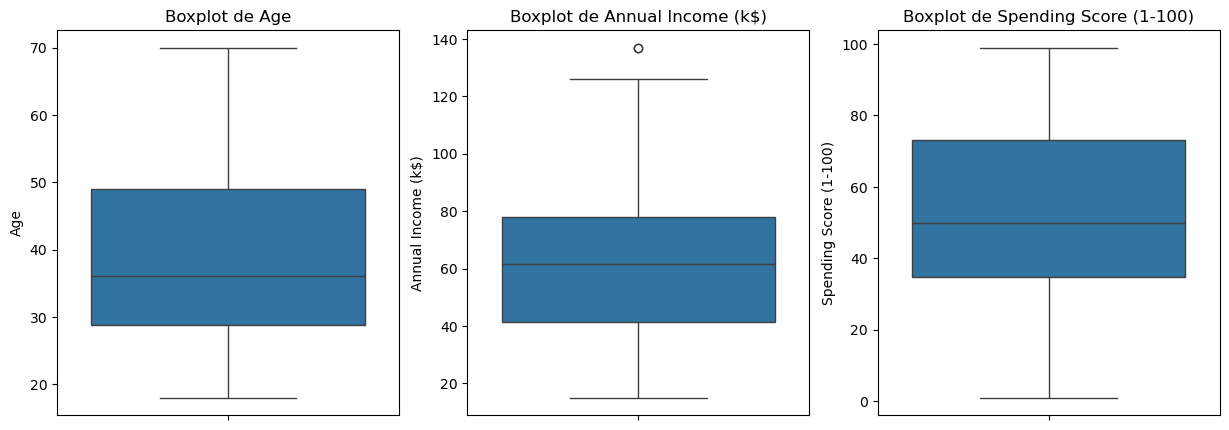

In [9]:
# **Boxplots**
plt.figure(figsize=(15, 5))
for i, col in enumerate(features_to_scale, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot de {col}")
#plt.savefig("boxplots.png")
plt.show()

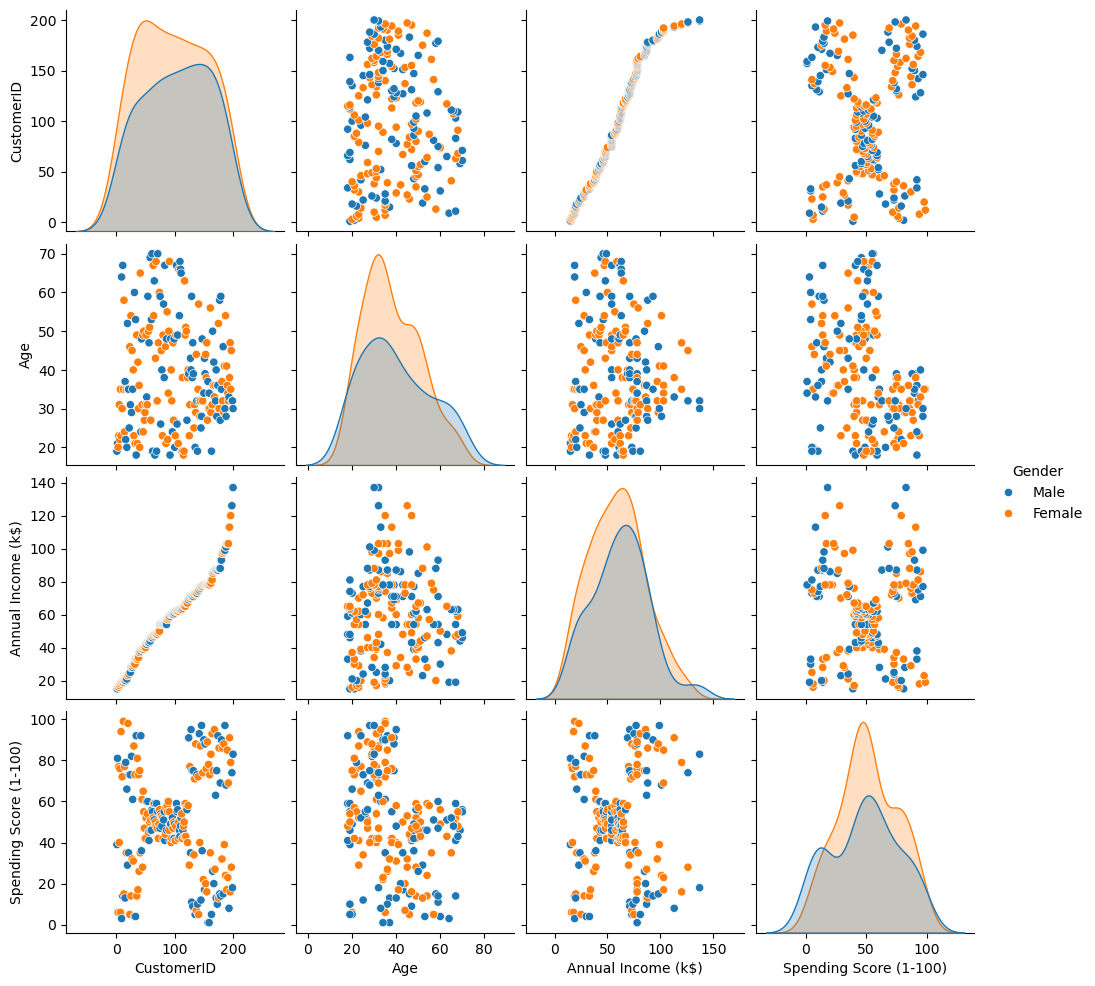

In [10]:
# **Matrice de corrélation et scatter plot**
sns.pairplot(data, hue="Gender", diag_kind="kde")
#plt.savefig("pairplot.png")
plt.show()

In [11]:
# ------------------------------------------------------------------------------
# 4. Feature Engineering
# ------------------------------------------------------------------------------
print("\n4-FEATURE ENGINEERING : Suppression de colonnes et création de classes...")


4-FEATURE ENGINEERING : Suppression de colonnes et création de classes...


In [12]:
# **Suppression de 'CustomerID' (non informatif)**
data.drop("CustomerID", axis=1, inplace=True)

In [13]:
# **Création de classes d'âge (optionnel)**
data["AgeGroup"] = pd.cut(data["Age"], bins=[0, 30, 50, 100], labels=["Jeune", "Adulte", "Senior"])
print("\nRépartition des classes d'âge :\n", data["AgeGroup"].value_counts())


Répartition des classes d'âge :
 AgeGroup
Adulte    98
Jeune     62
Senior    40
Name: count, dtype: int64


In [14]:
# ------------------------------------------------------------------------------
# 5. Réduction de dimension (PCA)
# ------------------------------------------------------------------------------
print("\n5-PCA : Réduction en 2D pour visualisation...")


5-PCA : Réduction en 2D pour visualisation...


In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data[features_to_scale])
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

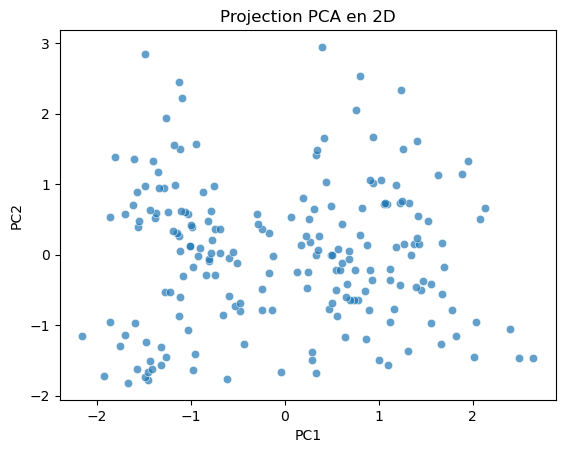

In [16]:
plt.figure()
sns.scatterplot(x="PC1", y="PC2", data=pca_df, alpha=0.7)
plt.title("Projection PCA en 2D")
#plt.savefig("pca_plot.png")
plt.show()

In [17]:
# ------------------------------------------------------------------------------
# 6. Clustering (K-means avec k de 2 à 6)
# ------------------------------------------------------------------------------
print("\n6-CLUSTERING : K-means avec k de 2 à 6 + évaluation (Elbow/Silhouette)...")


6-CLUSTERING : K-means avec k de 2 à 6 + évaluation (Elbow/Silhouette)...


In [18]:
# **Méthode Elbow**
inertias = []
for k in range(2, 7):  # k de 2 à 6 comme demandé
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data[features_to_scale])
    inertias.append(kmeans.inertia_)
    print(f" - k={k} : Inertie = {kmeans.inertia_:.2f}")

 - k=2 : Inertie = 389.39
 - k=3 : Inertie = 295.46
 - k=4 : Inertie = 205.23
 - k=5 : Inertie = 169.89
 - k=6 : Inertie = 134.35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

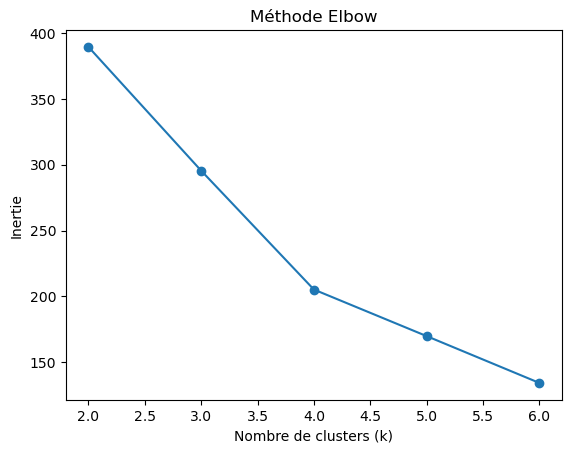

In [19]:
plt.figure()
plt.plot(range(2, 7), inertias, marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode Elbow")
#plt.savefig("elbow_method.png")
plt.show()

In [20]:
# **Score Silhouette**
silhouette_scores = []
for k in range(2, 7):  # k de 2 à 6
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data[features_to_scale])
    score = silhouette_score(scaled_data[features_to_scale], labels)
    silhouette_scores.append(score)
    print(f" - k={k} : Score Silhouette = {score:.2f}")

 - k=2 : Score Silhouette = 0.34
 - k=3 : Score Silhouette = 0.36
 - k=4 : Score Silhouette = 0.40
 - k=5 : Score Silhouette = 0.41
 - k=6 : Score Silhouette = 0.43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

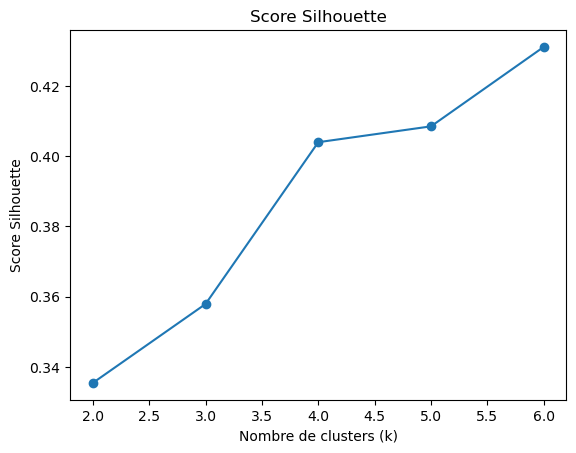

In [21]:
plt.figure()
plt.plot(range(2, 7), silhouette_scores, marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score Silhouette")
plt.title("Score Silhouette")
#plt.savefig("silhouette_score.png")
plt.show()

In [22]:
# **Choix final de k=5** (optimal pour ce dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_data[features_to_scale])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
# ------------------------------------------------------------------------------
# 7. Interprétation des clusters
# ------------------------------------------------------------------------------
print("\n7-INTERPRÉTATION : Analyse des centroïdes et visualisation...")


7-INTERPRÉTATION : Analyse des centroïdes et visualisation...


In [24]:
# **Centroïdes dans l'espace original**
cluster_means = data.groupby("Cluster")[features_to_scale].mean()
print("\nCentroïdes des clusters :\n", cluster_means)


Centroïdes des clusters :
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


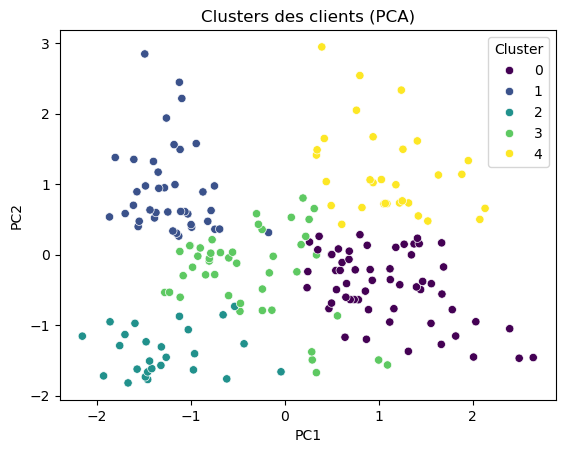

In [25]:
# **Visualisation des clusters en 2D (PCA)**
pca_df["Cluster"] = data["Cluster"]
plt.figure()
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="viridis")
plt.title("Clusters des clients (PCA)")
#plt.savefig("clusters_pca.png")
plt.show()

In [26]:
# ------------------------------------------------------------------------------
# 8. Conclusions
# ------------------------------------------------------------------------------
print("\n8-CONCLUSIONS : Synthèse et suggestions...")


8-CONCLUSIONS : Synthèse et suggestions...


In [27]:
print("""
**Résultats** :
- 5 clusters identifiés avec des profils distincts (voir centroïdes).
- Visualisation PCA confirmant la séparation des groupes.

**Suggestions** :
- Approfondir avec des données supplémentaires (ex: historique d'achats).
- Tester DBSCAN pour détecter des clusters non convexes.
""")


**Résultats** :
- 5 clusters identifiés avec des profils distincts (voir centroïdes).
- Visualisation PCA confirmant la séparation des groupes.

**Suggestions** :
- Approfondir avec des données supplémentaires (ex: historique d'achats).
- Tester DBSCAN pour détecter des clusters non convexes.



In [28]:
# Sauvegarde des données avec clusters
data.to_csv("Mall_Customers_Clustered.csv", index=False)
print("\n✅ Fichier sauvegardé : 'Mall_Customers_Clustered.csv'")


✅ Fichier sauvegardé : 'Mall_Customers_Clustered.csv'
